In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score
import lightgbm as lgb
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data_final.csv')
features = data.columns[2:]
target = data.columns[1]
X_norm = data[features]
Y = data[target]

In [3]:
def train_model(model, X, y, cv):
    return cross_val_score(model, X, y, scoring='r2', cv=cv)

def plot_results(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'{model_name} - True vs Predicted')
    plt.grid(True)
    plt.show()

# Define the models
models = {
    "LightGBM": lgb.LGBMRegressor(),
    "XGBoost": xgb.XGBRegressor()
}

# Define KFold cross-validator
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform model training and evaluation
results = {}
for model_name, model in models.items():
    scores = train_model(model, X_norm, Y, cv)
    results[model_name] = scores.mean()

# Print average R2 scores for each model
for model_name, score in results.items():
    print(f'{model_name}: Average R2 Score = {score:.4f}')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29285
[LightGBM] [Info] Number of data points in the train set: 17686, number of used features: 177
[LightGBM] [Info] Start training from score 0.250807
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29301
[LightGBM] [Info] Number of data points in the train set: 17686, number of used features: 177
[LightGBM] [Info] Start training from score 0.250927
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29289
[LightGBM] [Info] Number of data points in

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29423
[LightGBM] [Info] Number of data points in the train set: 19652, number of used features: 177
[LightGBM] [Info] Start training from score 0.250869


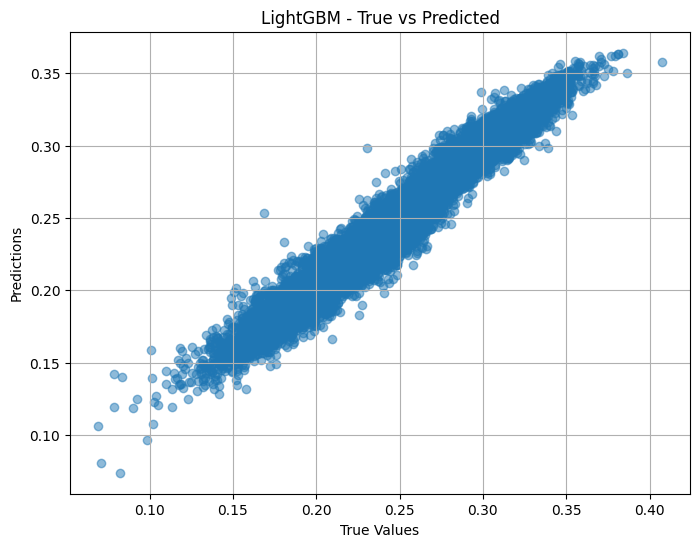

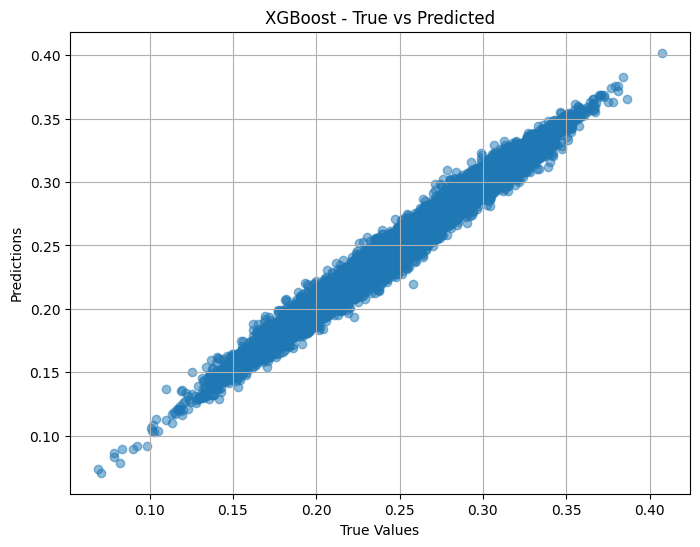

In [4]:
for model_name, model in models.items():
    model.fit(X_norm, Y)
    y_pred = model.predict(X_norm)
    plot_results(Y, y_pred, model_name)


In [5]:
from sklearn.model_selection import GridSearchCV

# Define the parameters grid for LightGBM
param_grid = {
    'num_leaves': [10, 20, 30],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Initialize LightGBM model
lgb_model = lgb.LGBMRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, scoring='r2', cv=cv)
grid_search.fit(X_norm, Y)

# Print the best parameters and the corresponding R2 score
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29285
[LightGBM] [Info] Number of data points in the train set: 17686, number of used features: 177
[LightGBM] [Info] Start training from score 0.250807
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29301
[LightGBM] [Info] Number of data points in the train set: 17686, number of used features: 177
[LightGBM] [Info] Start training from score 0.250927
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29289
[LightGBM] [Info] Number of data points in the train set: 17687, number of used features: 177
[LightGBM] [